<h1 style="background-color: #001f3f; color: #ff0; padding: 12px; border: 2px solid #fff; text-align: center;border-radius: 8px;">Home Equity Loan Prediction</h1>

In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import statistics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, auc, roc_curve, roc_auc_score


# EDA - Exploratory Data Analysis

In [214]:
data = pd.read_csv('hmeq.csv')
data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [215]:
data.shape

(5960, 13)

In [216]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [217]:
num_cols = data.select_dtypes(include=['float64', 'int64']) 
cat_cols = data.select_dtypes(include=['object']) 

print("Numeric Variables:")
print(num_cols.columns.tolist())

print("\nCategorical Variables:")
print(cat_cols.columns.tolist())


Numeric Variables:
['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']

Categorical Variables:
['REASON', 'JOB']


In [218]:
for col in cat_cols:
    print('We Have {} Unique Values. Values in the {} Column: {}'.format(len(data[col].unique()),col,data[col].unique()))
    print('__'*30)

We Have 3 Unique Values. Values in the REASON Column: ['HomeImp' nan 'DebtCon']
____________________________________________________________
We Have 7 Unique Values. Values in the JOB Column: ['Other' nan 'Office' 'Sales' 'Mgr' 'ProfExe' 'Self']
____________________________________________________________


In [219]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BAD,5960.0,0.199497,0.399656,0.000000,0.000000,0.000000,0.000000,1.000000
LOAN,5960.0,18607.969799,11207.480417,1100.000000,11100.000000,16300.000000,23300.000000,89900.000000
MORTDUE,5442.0,73760.817200,44457.609458,2063.000000,46276.000000,65019.000000,91488.000000,399550.000000
VALUE,5848.0,101776.048741,57385.775334,8000.000000,66075.500000,89235.500000,119824.250000,855909.000000
YOJ,5445.0,8.922268,7.573982,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,5252.0,0.254570,0.846047,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,5380.0,0.449442,1.127266,0.000000,0.000000,0.000000,0.000000,15.000000
CLAGE,5652.0,179.766275,85.810092,0.000000,115.116702,173.466667,231.562278,1168.233561
NINQ,5450.0,1.186055,1.728675,0.000000,0.000000,1.000000,2.000000,17.000000
CLNO,5738.0,21.296096,10.138933,0.000000,15.000000,20.000000,26.000000,71.000000


In [220]:
for feature in num_cols:
    zero_values = (data[feature] == 0).sum()
    null_values = data[feature].isnull().sum()
    unique_values = len(data[feature].unique())

    print(f"Feature: {feature}")
    print(f"Number of 0 Values: {zero_values}")
    print(f"Number of Null Values: {null_values}")
    print(f"Unique Values: {unique_values}")
    print("="*30)

Feature: BAD
Number of 0 Values: 4771
Number of Null Values: 0
Unique Values: 2
Feature: LOAN
Number of 0 Values: 0
Number of Null Values: 0
Unique Values: 540
Feature: MORTDUE
Number of 0 Values: 0
Number of Null Values: 518
Unique Values: 5054
Feature: VALUE
Number of 0 Values: 0
Number of Null Values: 112
Unique Values: 5382
Feature: YOJ
Number of 0 Values: 415
Number of Null Values: 515
Unique Values: 100
Feature: DEROG
Number of 0 Values: 4527
Number of Null Values: 708
Unique Values: 12
Feature: DELINQ
Number of 0 Values: 4179
Number of Null Values: 580
Unique Values: 15
Feature: CLAGE
Number of 0 Values: 2
Number of Null Values: 308
Unique Values: 5315
Feature: NINQ
Number of 0 Values: 2531
Number of Null Values: 510
Unique Values: 17
Feature: CLNO
Number of 0 Values: 62
Number of Null Values: 222
Unique Values: 63
Feature: DEBTINC
Number of 0 Values: 0
Number of Null Values: 1267
Unique Values: 4694


**I'm looking at the distribution of Target value**

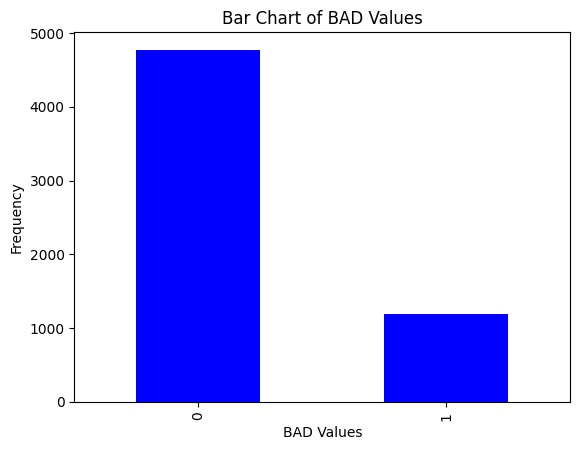

In [221]:
data['BAD'].value_counts().plot(kind='bar', color='blue')
plt.xlabel('BAD Values')
plt.ylabel('Frequency')
plt.title('Bar Chart of BAD Values')
plt.show()

**The distribution is very imbalanced. I will balance it using SMOTE.**

# Missing Values

In [222]:
data.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

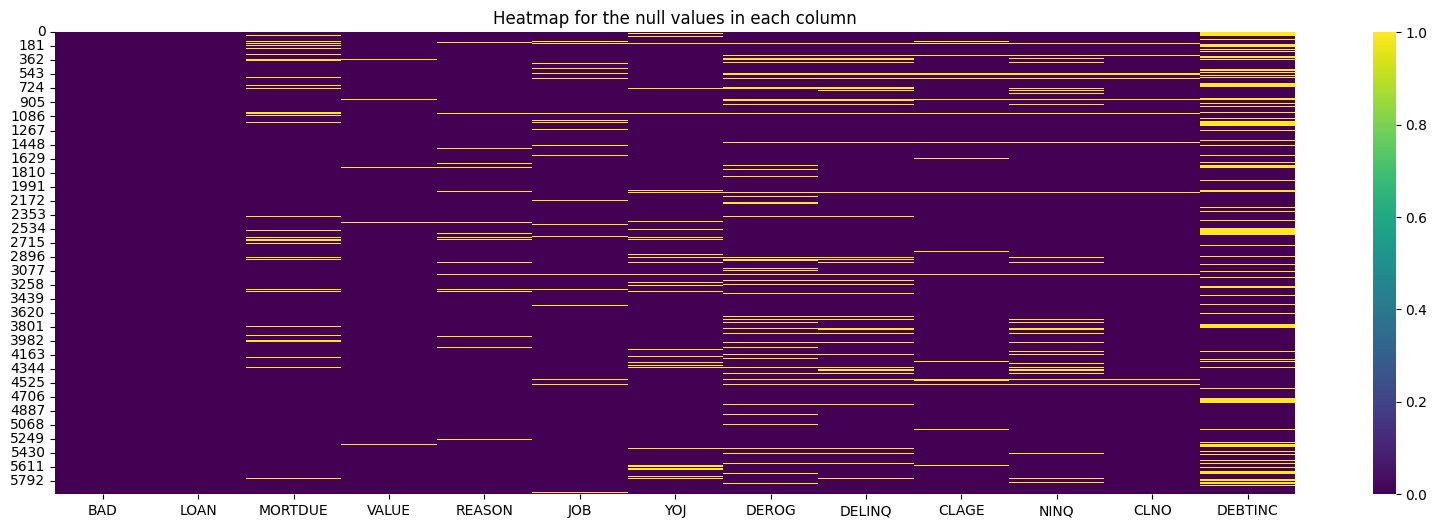

In [223]:
plt.figure(figsize=(20,6))
plt.title('Heatmap for the null values in each column')
sns.heatmap(data.isnull(),cmap='viridis');

## Continuous

+ LOAN (No null value)
+ MORTDUE
+ VALUE
+ YOJ
+ CLAGE
+ DEBTINC

### Mortdue

**MORTDUE: Amount due on the existing mortgage.**

In [224]:
mod_mortdue = statistics.mode(data['MORTDUE'])
print("Mode:", mod_mortdue)

median_mortdue = statistics.median(data['MORTDUE'])
print("Median:", median_mortdue)

Mode: 42000.0
Median: 62402.0


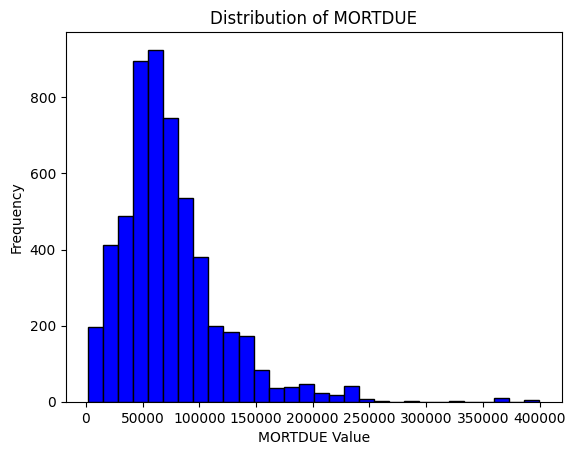

In [225]:
plt.hist(data['MORTDUE'], bins=30, color='blue', edgecolor='black')

plt.title('Distribution of MORTDUE')
plt.xlabel('MORTDUE Value')
plt.ylabel('Frequency')
plt.show()


Since it is continuous and right-skewed, I will fill it with Median

In [226]:
data['MORTDUE'] = data['MORTDUE'].fillna(data['MORTDUE'].median())

### VALUE

**VALUE: Current value of the property.**

In [227]:
mod_VALUE = statistics.mode(data['VALUE'])
print("Mode:", mod_VALUE)

median_VALUE = statistics.median(data['VALUE'])
print("Median:", median_VALUE)

Mode: 60000.0
Median: 120251.5


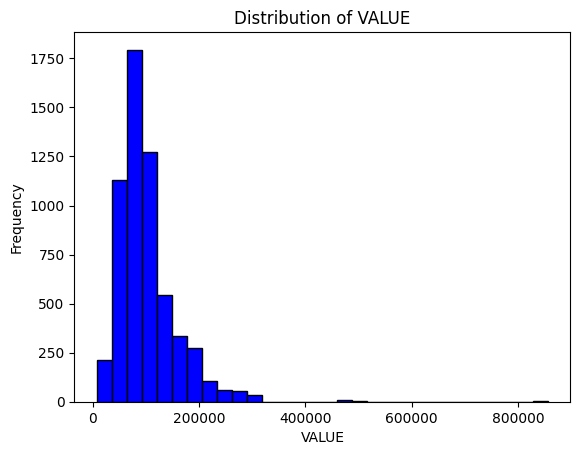

In [228]:
plt.hist(data['VALUE'], bins=30, color='blue', edgecolor='black')

plt.title('Distribution of VALUE')
plt.xlabel('VALUE')
plt.ylabel('Frequency')
plt.show()


Since it is continuous and right-skewed, I will fill it with Median

In [229]:
data['VALUE'] = data['VALUE'].fillna(data['VALUE'].median())

### YOJ

**YOJ: Years at present job.**

In [230]:
mod_YOJ = statistics.mode(data['YOJ'])
print("Mode:", mod_YOJ)

median_YOJ = statistics.median(data['YOJ'])
print("Median:", median_YOJ)

Mode: 0.0
Median: 5.0


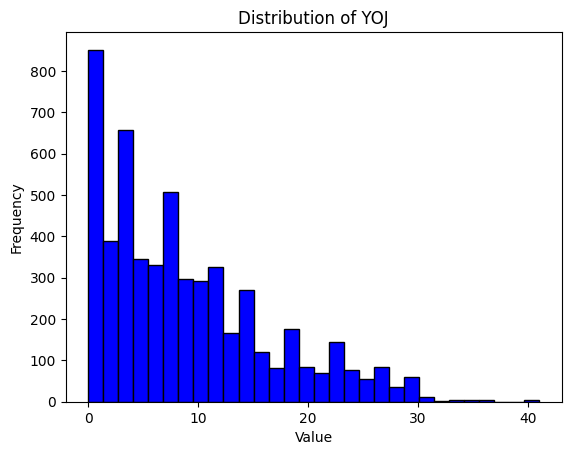

In [231]:
plt.hist(data['YOJ'], bins=30, color='blue', edgecolor='black')

plt.title('Distribution of YOJ')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


In [232]:
data['YOJ'].value_counts()

YOJ
0.00     415
1.00     363
2.00     347
5.00     333
4.00     324
        ... 
29.90      1
12.90      1
13.50      1
0.25       1
8.30       1
Name: count, Length: 99, dtype: int64

Since it is continuous and right-skewed, I will fill it with Median

In [233]:
data['YOJ'] = data['YOJ'].fillna(data['YOJ'].median())

### CLAGE

**CLAGE: Age of the oldest credit line in months.**

In [234]:
mod_CLAGE = statistics.mode(data['CLAGE'])
print("Mode:", mod_CLAGE)

median_CLAGE = statistics.median(data['CLAGE'])
print("Median:", median_CLAGE)

Mode: 102.5
Median: 199.33037854499997


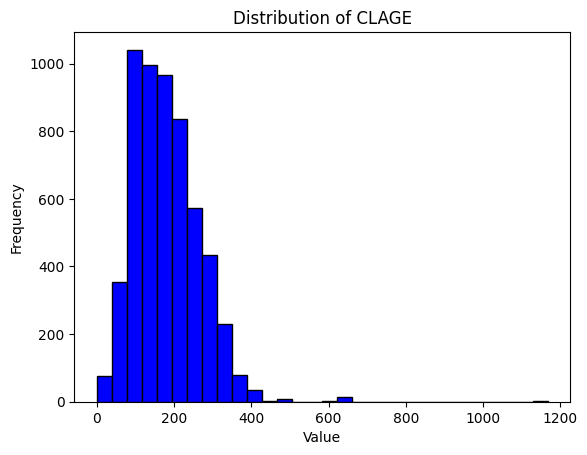

In [235]:
plt.hist(data['CLAGE'], bins=30, color='blue', edgecolor='black')

plt.title('Distribution of CLAGE')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


In [236]:
data['CLAGE'] = data['CLAGE'].fillna(data['CLAGE'].median())

### DEBTINC

**DEBTINC: Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.**

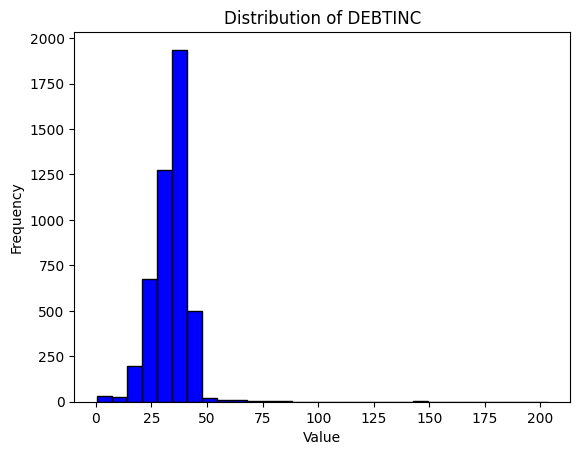

In [237]:
plt.hist(data['DEBTINC'], bins=30, color='blue', edgecolor='black')

plt.title('Distribution of DEBTINC')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


In [238]:
data['DEBTINC'] = data['DEBTINC'].fillna(data['DEBTINC'].median())

## Discrete

+ DEROG
+ DELINQ
+ NINQ
+ CLNO

### DEROG

**DEROG: Number of major derogatory reports (which indicates a serious delinquency or late payments).**

In [239]:
mod_DEROG = statistics.mode(data['DEROG'])
print("Mode:", mod_DEROG)

median_DEROG = statistics.median(data['DEROG'])
print("Median:", median_DEROG)

Mode: 0.0
Median: 0.0


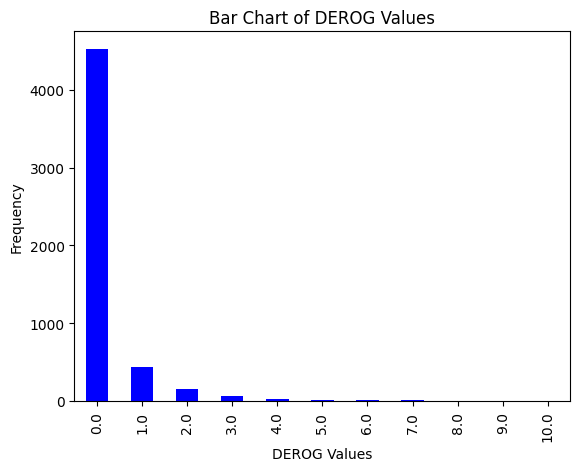

In [240]:
data['DEROG'].value_counts().plot(kind='bar', color='blue')
plt.xlabel('DEROG Values')
plt.ylabel('Frequency')
plt.title('Bar Chart of DEROG Values')
plt.show()

In [241]:
data['DEROG'].value_counts()

DEROG
0.0     4527
1.0      435
2.0      160
3.0       58
4.0       23
5.0       15
6.0       15
7.0        8
8.0        6
9.0        3
10.0       2
Name: count, dtype: int64

In [242]:
data['DEROG'] = data['DEROG'].fillna(data['DEROG'].mode()[0])

### DELINQ

**DELINQ: Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due).**

In [243]:
mod_DELINQ = statistics.mode(data['DELINQ'])
print("Mode:", mod_DELINQ)

median_DELINQ = statistics.median(data['DELINQ'])
print("Median:", median_DELINQ)

Mode: 0.0
Median: 0.0


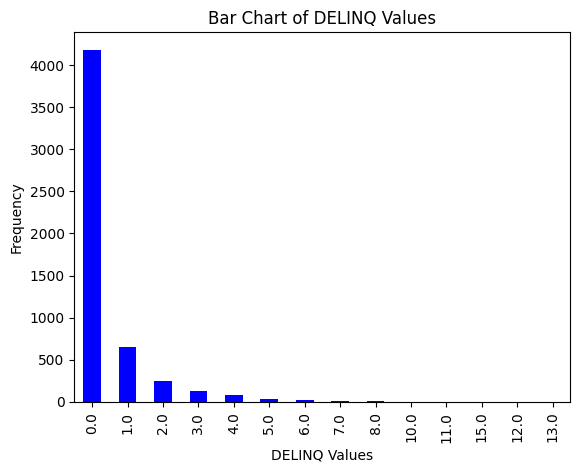

In [244]:
data['DELINQ'].value_counts().plot(kind='bar', color='blue')
plt.xlabel('DELINQ Values')
plt.ylabel('Frequency')
plt.title('Bar Chart of DELINQ Values')
plt.show()

In [245]:
data['DELINQ'] = data['DELINQ'].fillna(data['DELINQ'].mode()[0])

### NINQ

**NINQ: Number of recent credit inquiries.**

In [246]:
mod_NINQ = statistics.mode(data['NINQ'])
print("Mode:", mod_NINQ)

median_NINQ = statistics.median(data['NINQ'])
print("Median:", median_NINQ)

Mode: 0.0
Median: 1.0


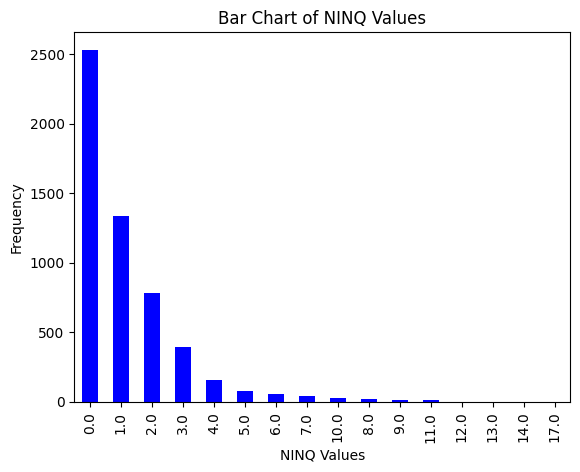

In [247]:
data['NINQ'].value_counts().plot(kind='bar', color='blue')
plt.xlabel('NINQ Values')
plt.ylabel('Frequency')
plt.title('Bar Chart of NINQ Values')
plt.show()

In [248]:
data['NINQ'] = data['NINQ'].fillna(data['NINQ'].mode()[0])

### CLNO

**CLNO: Number of existing credit lines.**

In [249]:
mod_CLNO = statistics.mode(data['CLNO'])
print("Mode:", mod_CLNO)

median_CLNO = statistics.median(data['CLNO'])
print("Median:", median_CLNO)

Mode: 16.0
Median: 21.0


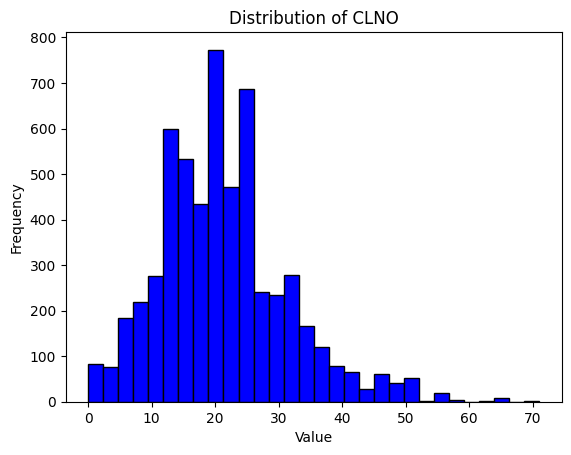

In [250]:
plt.hist(data['CLNO'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of CLNO')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


In [251]:
data['CLNO'] = data['CLNO'].fillna(data['CLNO'].mode()[0])

### Categorical

+ REASON
+ JOB

### REASON

**REASON: Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts)**

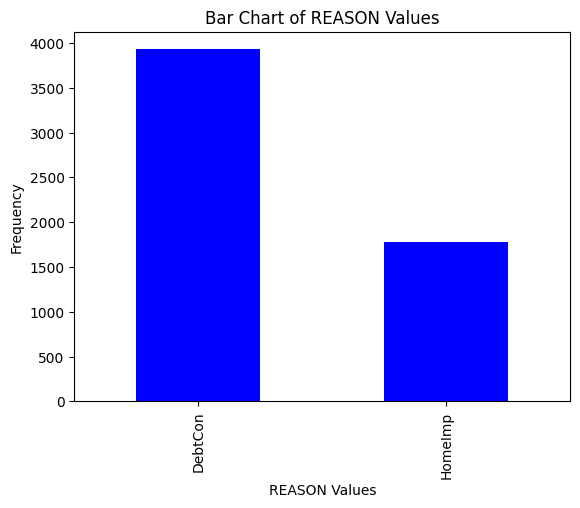

In [252]:
data['REASON'].value_counts().plot(kind='bar', color='blue')
plt.xlabel('REASON Values')
plt.ylabel('Frequency')
plt.title('Bar Chart of REASON Values')
plt.show()

In [253]:
data['REASON'] = data['REASON'].fillna(data['REASON'].mode()[0])

### JOB

**JOB: The type of job that loan applicant has such as manager, self, etc.**

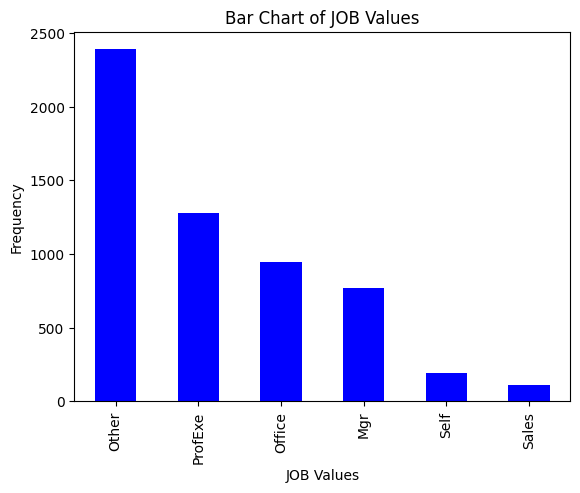

In [254]:
data['JOB'].value_counts().plot(kind='bar', color='blue')
plt.xlabel('JOB Values')
plt.ylabel('Frequency')
plt.title('Bar Chart of JOB Values')
plt.show()

In [255]:
data['JOB'] = data['JOB'].fillna(data['JOB'].mode()[0])

In [256]:
data.isnull().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

# Correlation

In [257]:
corr = num_cols.corr()

# Sort the correlations for the 'BAD' column in descending order
top_corr = corr['BAD'].sort_values(ascending=False)[1:20].to_frame()

# Apply a background gradient to visually represent the correlations using the seaborn library
styled_corr = top_corr.style.background_gradient(axis=1, cmap=sns.light_palette('green', as_cmap=True))

styled_corr

,BAD
DELINQ,0.354107
DEROG,0.276081
DEBTINC,0.199835
NINQ,0.174980
CLNO,-0.004157
VALUE,-0.029954
MORTDUE,-0.048219
YOJ,-0.060238
LOAN,-0.075099
CLAGE,-0.170499


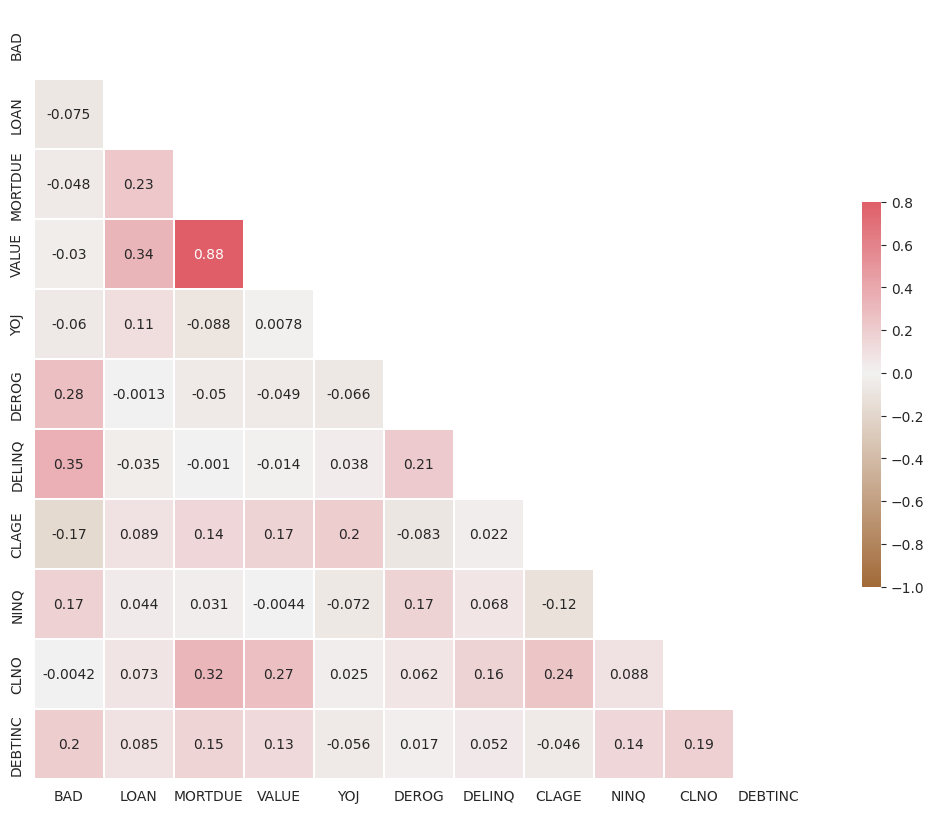

In [258]:
# Create a triangular mask
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Set the color palette
cmap = sns.diverging_palette(40, 10, as_cmap=True)

# Draw the heatmap on a white background
with sns.axes_style('white'):
    # Create a figure and axes
    fig, ax = plt.subplots(figsize=(15, 10))

    # Draw the correlation matrix as a heatmap, using the triangular mask
    sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, center=0, vmin=-1, vmax=0.8,
                square=True, cbar_kws={'shrink': 0.5, 'orientation': 'vertical'}, linewidth=.02)
    
plt.show()

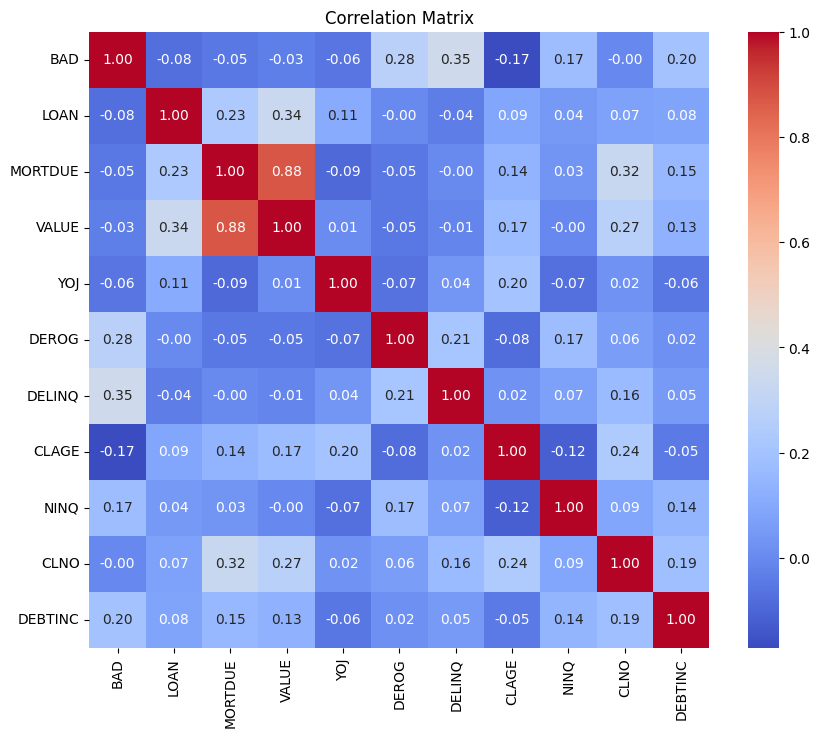

In [259]:
correlation_matrix_num = num_cols.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_num, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

DELINQ: Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due).

DEROG: Number of major derogatory reports (which indicates a serious delinquency or late payments).

DEBTINC: Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

NINQ: Number of recent credit inquiries.

CLAGE: Age of the oldest credit line in months. (Inverse Correlation)

## Outlier

**I will look at outliers in these columns:**

+ LOAN
+ MORTDUE
+ VALUE
+ YOJ
+ CLAGE
+ DEBTINC

### LOAN

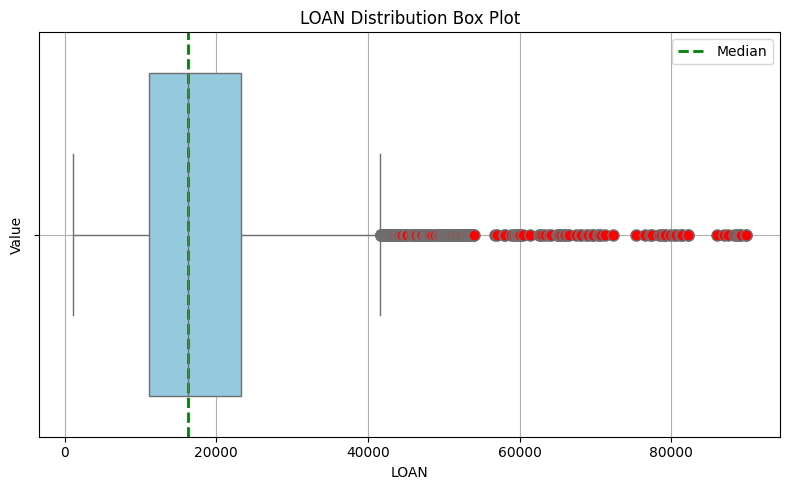

In [260]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x="LOAN", color='skyblue', flierprops=dict(marker='o', markersize=8, markerfacecolor='red'))
plt.title('LOAN Distribution Box Plot')
plt.xlabel('LOAN')
plt.ylabel('Value')
median_loan = data['LOAN'].median()
plt.axvline(median_loan, color='green', linestyle='--', linewidth=2, label='Median')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

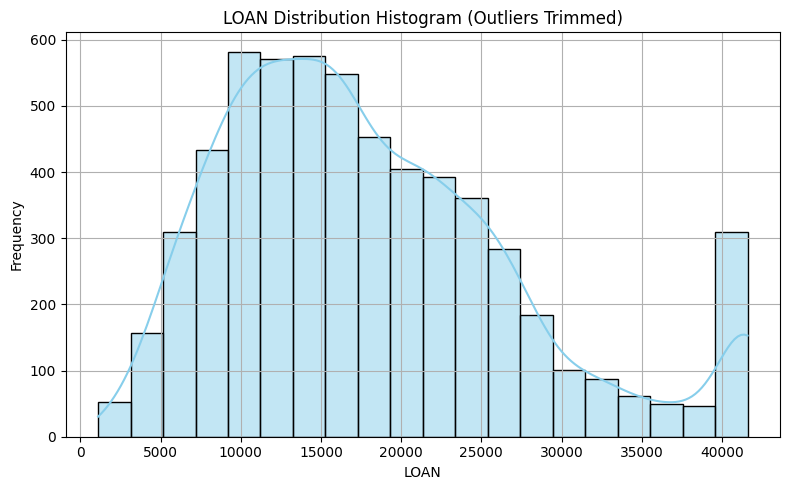

In [261]:
Q1 = data['LOAN'].quantile(0.25)
Q3 = data['LOAN'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

data['LOAN'] = data['LOAN'].apply(lambda x: lower_limit if x < lower_limit else (upper_limit if x > upper_limit else x))

plt.figure(figsize=(8, 5))
sns.histplot(data=data, x="LOAN", bins=20, kde=True, color='skyblue')
plt.title('LOAN Distribution Histogram (Outliers Trimmed)')
plt.xlabel('LOAN')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

In [262]:
from scipy import stats
z_scores = stats.zscore(data['LOAN'])
abs_z_scores = np.abs(z_scores)
outliers = (abs_z_scores > 3)
outlier_indices = np.where(outliers)[0]

outlier_values = data['LOAN'].iloc[outlier_indices]
sorted_outlier_values_descending = outlier_values.sort_values(ascending=False)

print(sorted_outlier_values_descending)

Series([], Name: LOAN, dtype: float64)


### MORTDUE

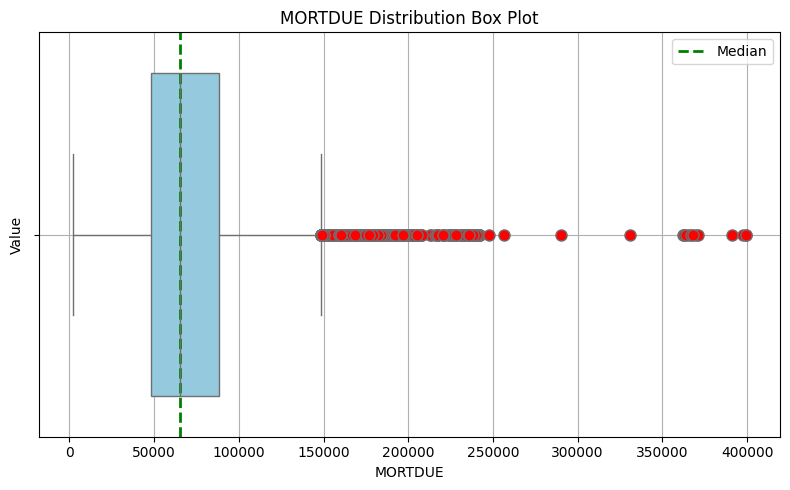

In [263]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x="MORTDUE", color='skyblue', flierprops=dict(marker='o', markersize=8, markerfacecolor='red'))
plt.title('MORTDUE Distribution Box Plot')
plt.xlabel('MORTDUE')
plt.ylabel('Value')
median_MORTDUE = data['MORTDUE'].median()
plt.axvline(median_MORTDUE, color='green', linestyle='--', linewidth=2, label='Median')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [264]:
Q1 = data['MORTDUE'].quantile(0.25)
Q3 = data['MORTDUE'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

data['MORTDUE'] = data['MORTDUE'].apply(lambda x: lower_limit if x < lower_limit else (upper_limit if x > upper_limit else x))

plt.figure(figsize=(8, 5))
sns.histplot(data=data, x="MORTDUE", bins=20, kde=True, color='skyblue')
plt.title('MORTDUE Distribution Histogram (Outliers Trimmed)')
plt.xlabel('MORTDUE')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

In [265]:
from scipy import stats
z_scores = stats.zscore(data['MORTDUE'])
abs_z_scores = np.abs(z_scores)
outliers = (abs_z_scores > 3)
outlier_indices = np.where(outliers)[0]

outlier_values = data['MORTDUE'].iloc[outlier_indices]
sorted_outlier_values_descending = outlier_values.sort_values(ascending=False)

sorted_outlier_values_descending.head()

2522    399550.0
5638    399412.0
5586    397299.0
5545    391000.0
5682    371003.0
          ...   
5904    202000.0
5610    201996.0
4910    201877.0
1684    201264.0
5636    200731.0
Name: MORTDUE, Length: 108, dtype: float64


### VALUE

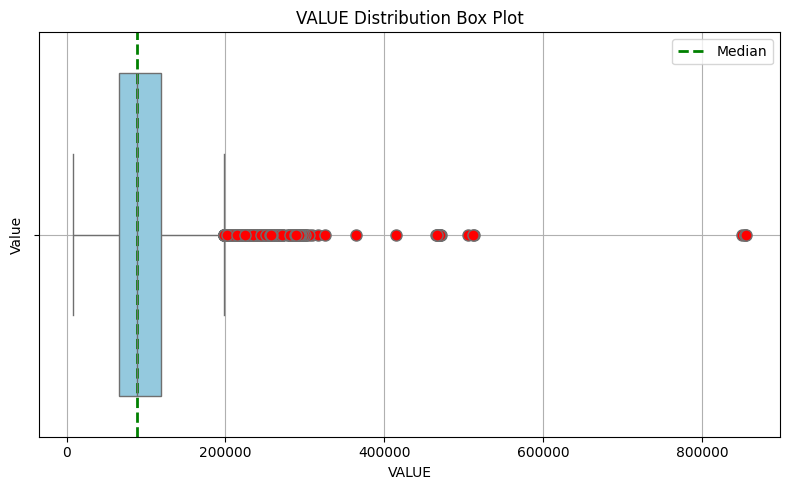

In [266]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x="VALUE", color='skyblue', flierprops=dict(marker='o', markersize=8, markerfacecolor='red'))
plt.title('VALUE Distribution Box Plot')
plt.xlabel('VALUE')
plt.ylabel('Value')
median_VALUE = data['VALUE'].median()
plt.axvline(median_VALUE, color='green', linestyle='--', linewidth=2, label='Median')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [267]:
data.query('VALUE>800000')

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5665,1,40000.0,65019.0,850000.0,HomeImp,Other,17.0,0.0,0.0,186.666667,1.0,24.0,34.818262
5706,1,41600.0,65019.0,854112.0,HomeImp,Other,16.0,0.0,0.0,180.608878,0.0,23.0,42.071645
5707,1,41600.0,65019.0,854114.0,HomeImp,Other,18.0,0.0,0.0,189.099378,1.0,23.0,43.258779
5752,1,41600.0,65019.0,855909.0,HomeImp,Other,16.0,0.0,0.0,196.403636,0.0,23.0,42.985408


In [268]:
from scipy import stats
z_scores = stats.zscore(data['VALUE'])
abs_z_scores = np.abs(z_scores)
outliers = (abs_z_scores > 3)
outlier_indices = np.where(outliers)[0]

outlier_values = data['VALUE'].iloc[outlier_indices]
sorted_outlier_values_descending = outlier_values.sort_values(ascending=False)

sorted_outlier_values_descending.head()

5752    855909.0
5707    854114.0
5706    854112.0
5665    850000.0
5586    512650.0
Name: VALUE, dtype: float64

### YOJ

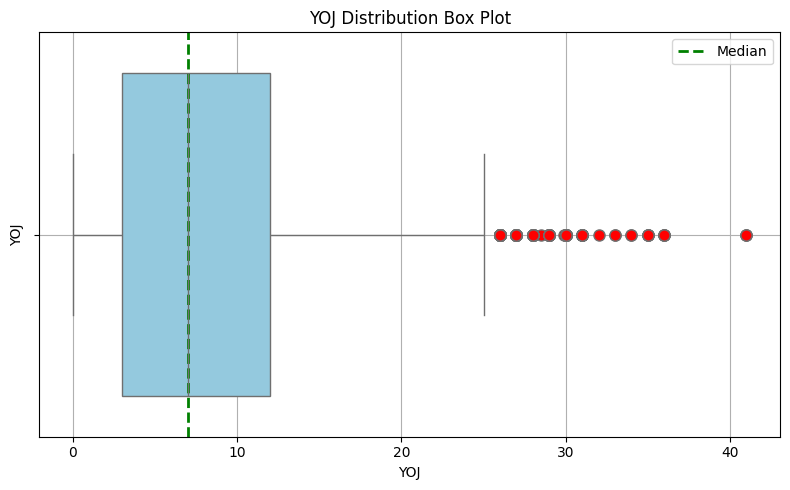

In [269]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x="YOJ", color='skyblue', flierprops=dict(marker='o', markersize=8, markerfacecolor='red'))
plt.title('YOJ Distribution Box Plot')
plt.xlabel('YOJ')
plt.ylabel('YOJ')
median_YOJ = data['YOJ'].median()
plt.axvline(median_YOJ, color='green', linestyle='--', linewidth=2, label='Median')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [270]:
data.query('YOJ>40')

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
1827,1,12300.0,77000.0,94000.0,DebtCon,Mgr,41.0,0.0,4.0,212.866667,4.0,17.0,34.818262
3160,1,17000.0,74910.0,112375.0,DebtCon,Office,41.0,0.0,0.0,95.200000,3.0,28.0,34.818262
3870,1,20200.0,82181.0,119535.0,DebtCon,Office,41.0,0.0,0.0,105.219297,3.0,28.0,52.734861


In [271]:
from scipy import stats
z_scores = stats.zscore(data['YOJ'])
abs_z_scores = np.abs(z_scores)
outliers = (abs_z_scores > 3)
outlier_indices = np.where(outliers)[0]

outlier_values = data['YOJ'].iloc[outlier_indices]
sorted_outlier_values_descending = outlier_values.sort_values(ascending=False)

sorted_outlier_values_descending.head(3)

1827    41.0
3160    41.0
3870    41.0
Name: YOJ, dtype: float64

### CLAGE

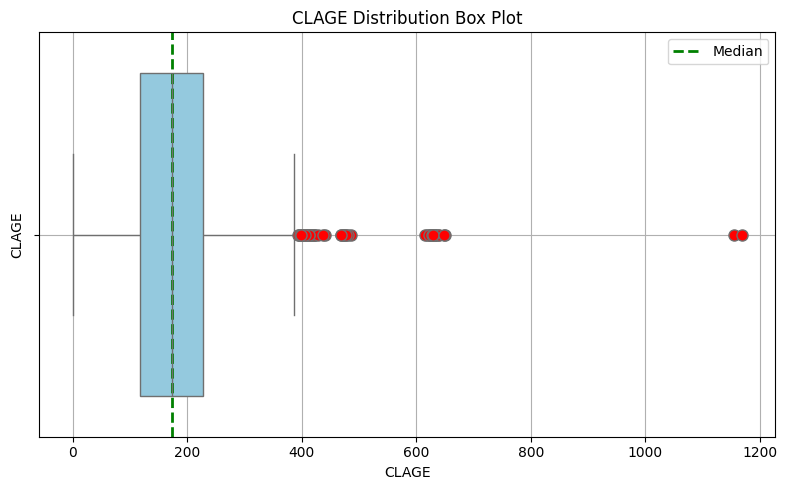

In [272]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x="CLAGE", color='skyblue', flierprops=dict(marker='o', markersize=8, markerfacecolor='red'))
plt.title('CLAGE Distribution Box Plot')
plt.xlabel('CLAGE')
plt.ylabel('CLAGE')
median_CLAGE = data['CLAGE'].median()
plt.axvline(median_CLAGE, color='green', linestyle='--', linewidth=2, label='Median')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [273]:
data.query('CLAGE>1000')

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
3097,1,16800.0,87300.0,155500.0,DebtCon,Other,3.0,0.0,0.0,1154.633333,0.0,0.0,34.818262
3679,1,19300.0,96454.0,157809.0,DebtCon,Other,3.0,0.0,0.0,1168.233561,0.0,0.0,40.206138


In [274]:
from scipy import stats
z_scores = stats.zscore(data['CLAGE'])
abs_z_scores = np.abs(z_scores)
outliers = (abs_z_scores > 3)
outlier_indices = np.where(outliers)[0]

outlier_values = data['CLAGE'].iloc[outlier_indices]
sorted_outlier_values_descending = outlier_values.sort_values(ascending=False)

sorted_outlier_values_descending.head(2)

3679    1168.233561
3097    1154.633333
Name: CLAGE, dtype: float64

### DEBTINC

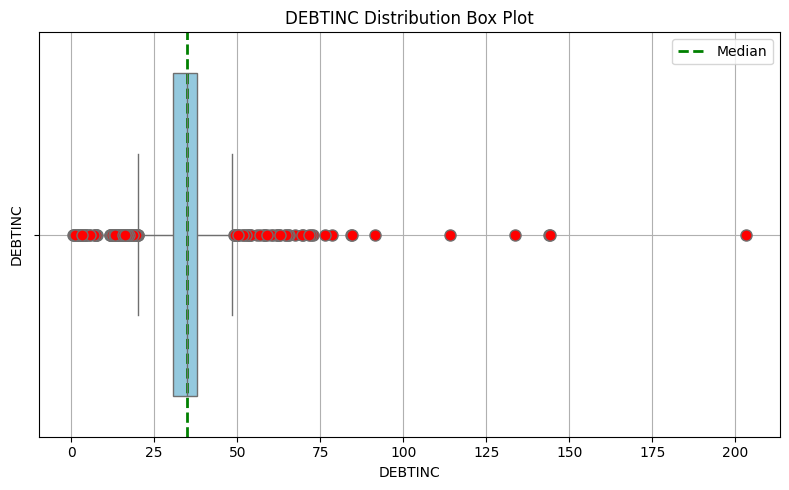

In [275]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x="DEBTINC", color='skyblue', flierprops=dict(marker='o', markersize=8, markerfacecolor='red'))
plt.title('DEBTINC Distribution Box Plot')
plt.xlabel('DEBTINC')
plt.ylabel('DEBTINC')
median_DEBTINC = data['DEBTINC'].median()
plt.axvline(median_DEBTINC, color='green', linestyle='--', linewidth=2, label='Median')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [276]:
data.query('DEBTINC>200')

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
4473,1,23300.0,103783.0,132612.0,DebtCon,Sales,1.0,0.0,0.0,120.347967,0.0,19.0,203.312149


In [277]:
from scipy import stats
z_scores = stats.zscore(data['DEBTINC'])
abs_z_scores = np.abs(z_scores)
outliers = (abs_z_scores > 3)
outlier_indices = np.where(outliers)[0]

outlier_values = data['DEBTINC'].iloc[outlier_indices]
sorted_outlier_values_descending = outlier_values.sort_values(ascending=False)

sorted_outlier_values_descending.head(1)

4473    203.312149
Name: DEBTINC, dtype: float64

In [278]:
index_list = [5665, 5706, 5707, 5752, 1827, 3160, 3870, 3097, 3679, 4473]

data = data.drop(index=index_list)

## SKEWNESS

In [279]:
from scipy.stats import skew

columns = ["MORTDUE", "VALUE", "YOJ", "CLAGE", "LOAN"]

skewed_feats = data[columns].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(15)


Skew in numerical features: 



,Skew
MORTDUE,1.941085
VALUE,1.883699
YOJ,1.072210
CLAGE,0.919490
LOAN,0.831422


Mu - Average

Sigma - Standard Deviation

If the mean is close to 0 and the standard deviation is close to 1, we know that there may be a normal distribution.

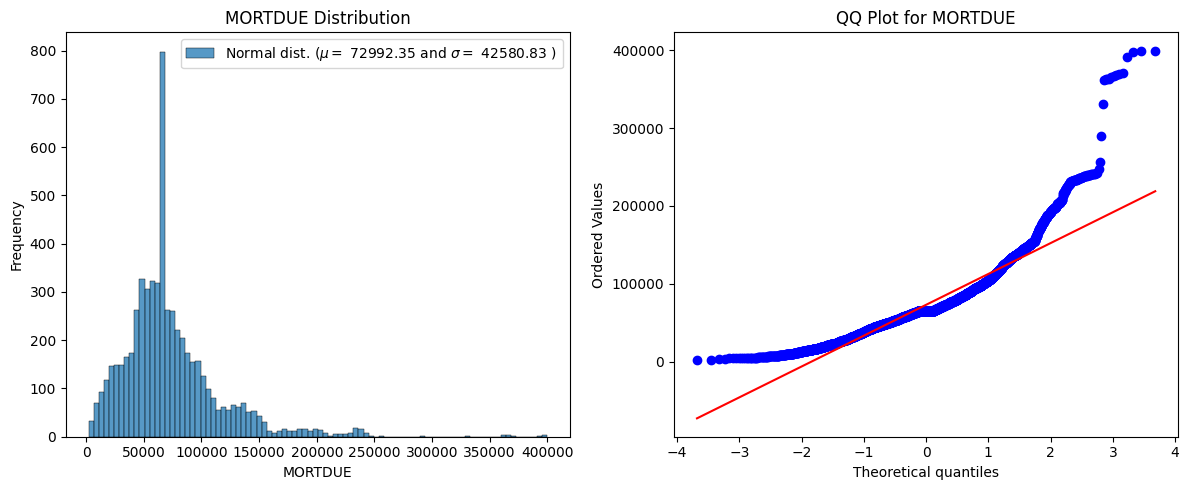

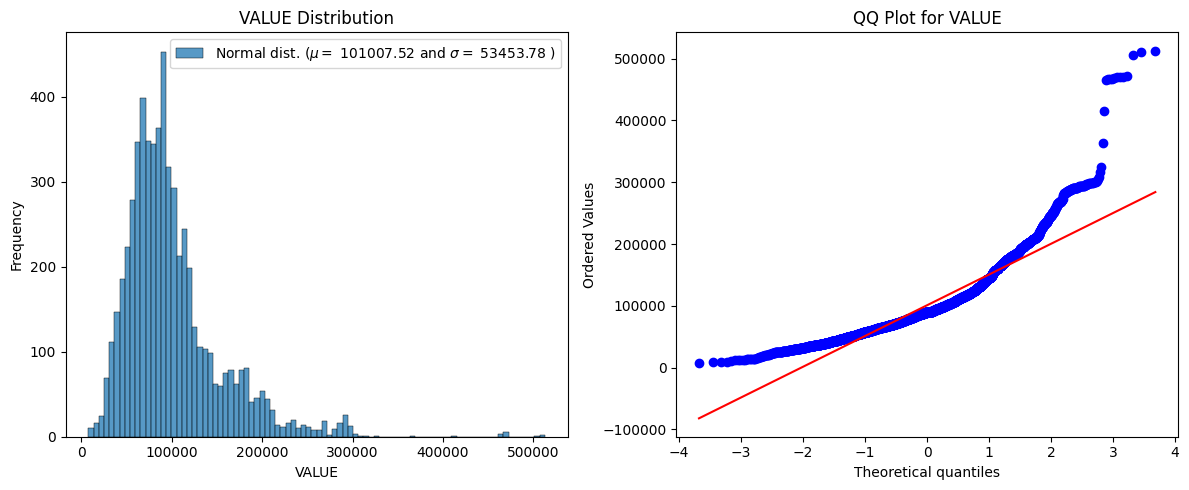

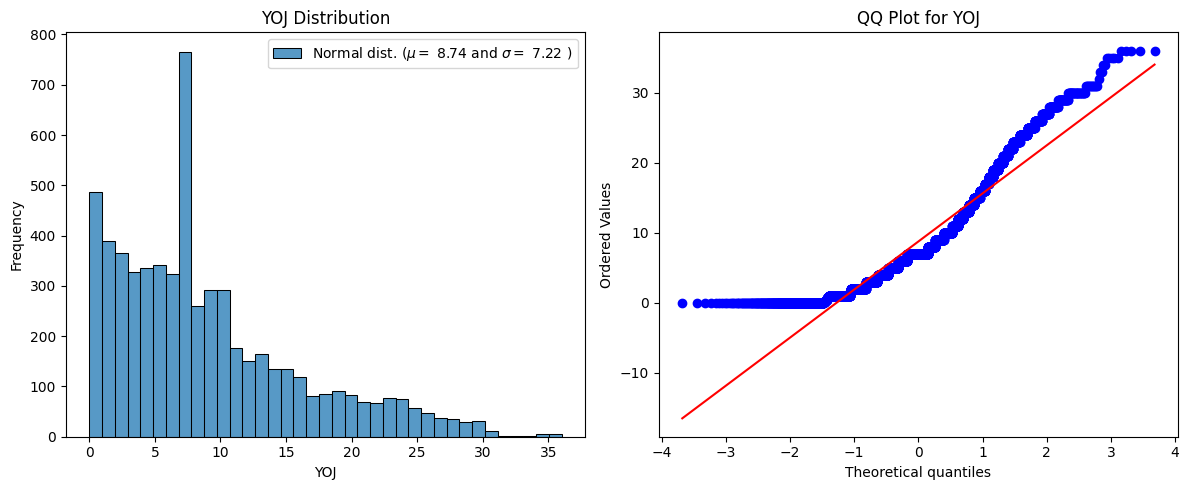

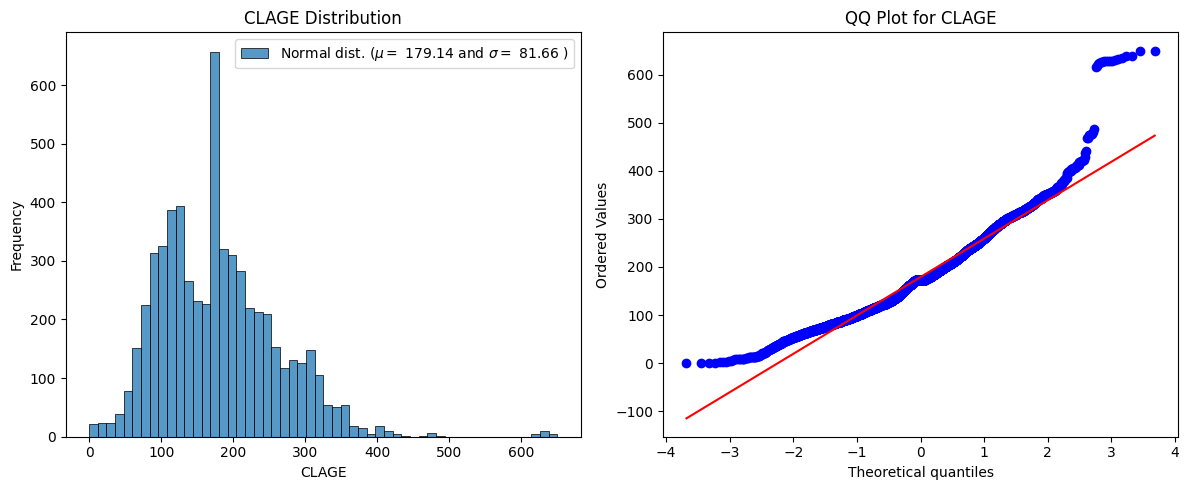

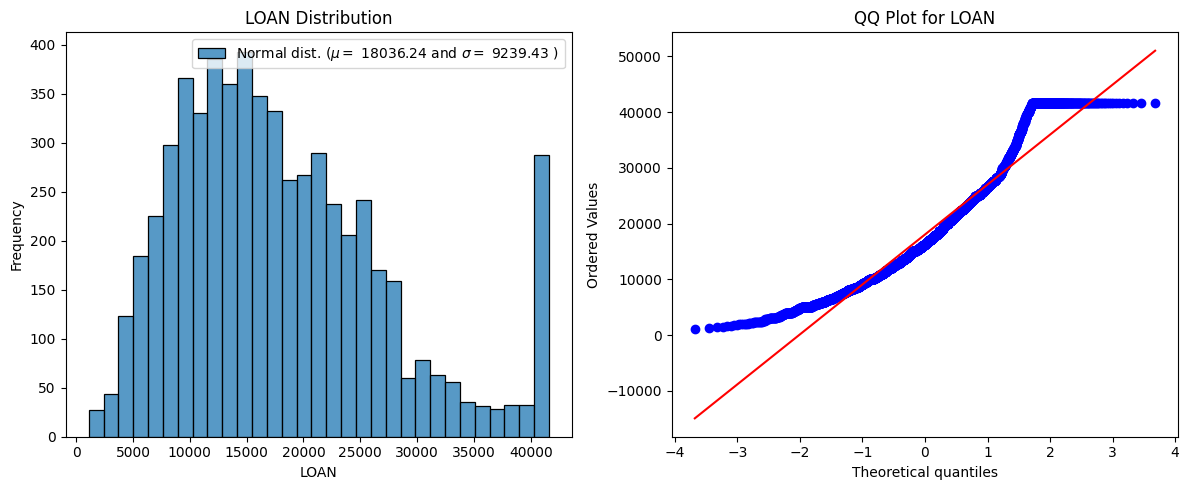

In [280]:
from scipy.stats import norm, skew, probplot
import seaborn as sns
import matplotlib.pyplot as plt

for col in columns:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Histogram
    sns.histplot(data[col], kde_kws={'fit': norm}, ax=axes[0])
    (mu, sigma) = norm.fit(data[col])
    axes[0].legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title(f'{col} Distribution')

    # QQ-plot
    probplot(data[col], plot=axes[1])
    axes[1].set_title(f'QQ Plot for {col}')

    plt.tight_layout()
    plt.show()


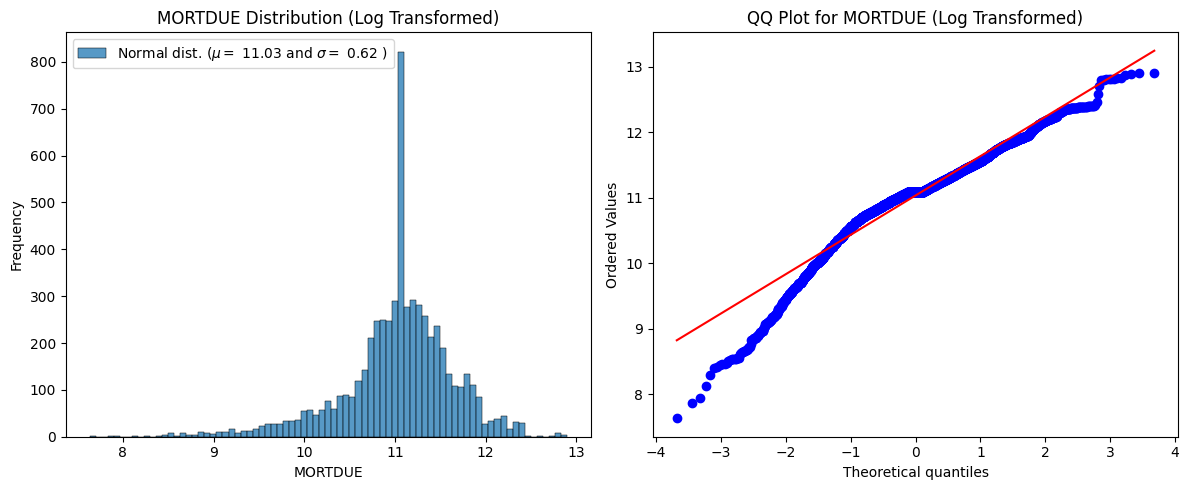

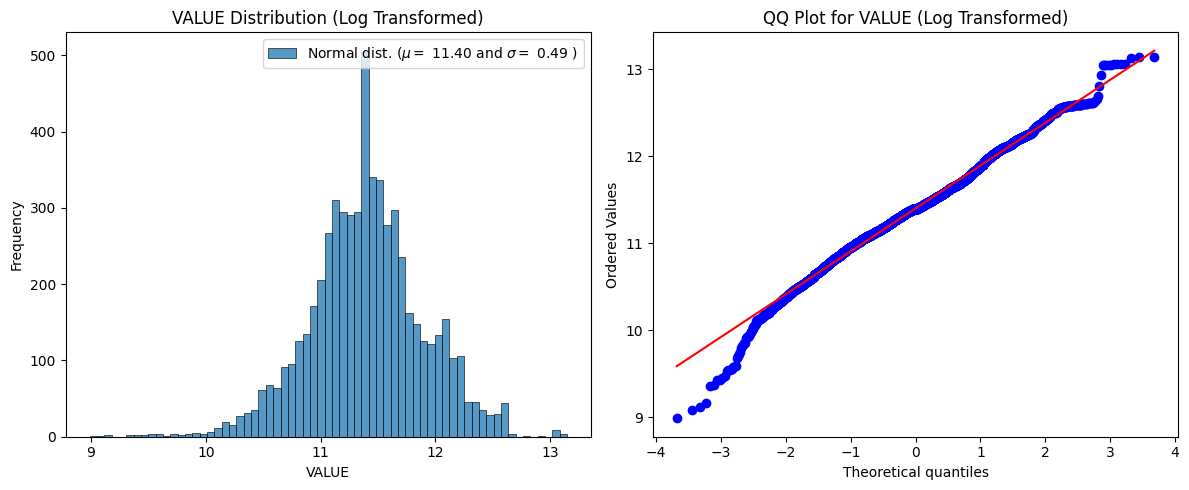

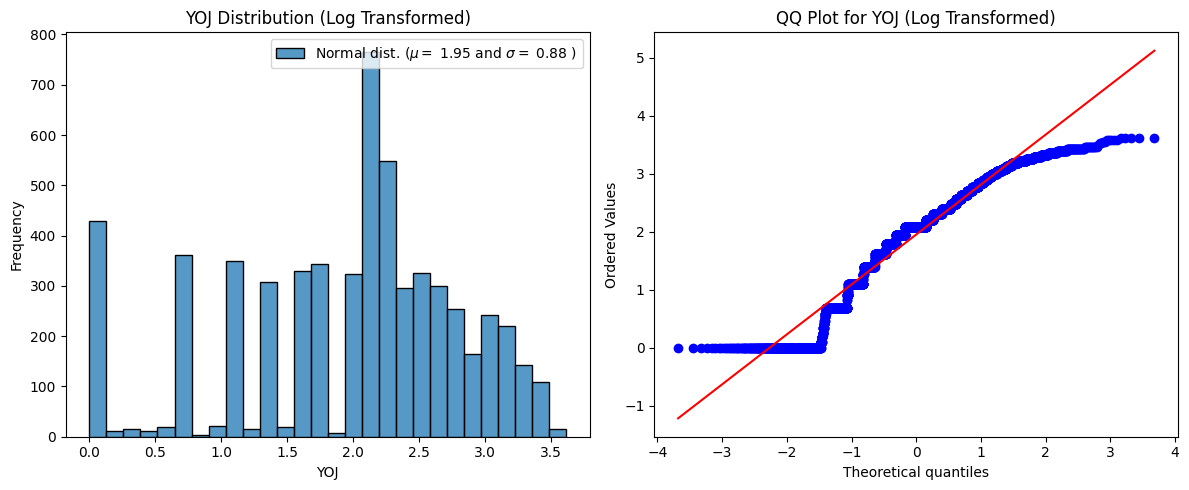

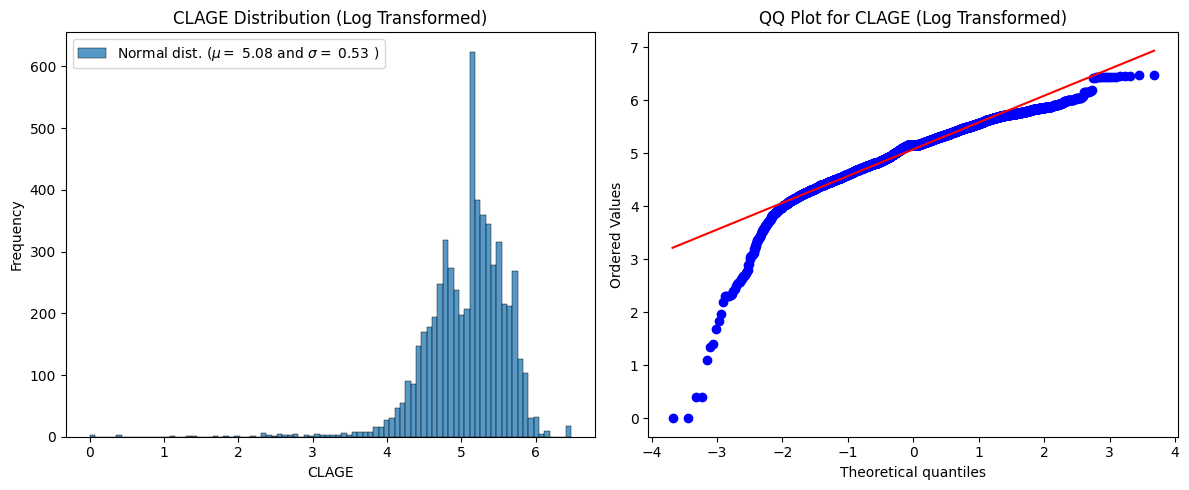

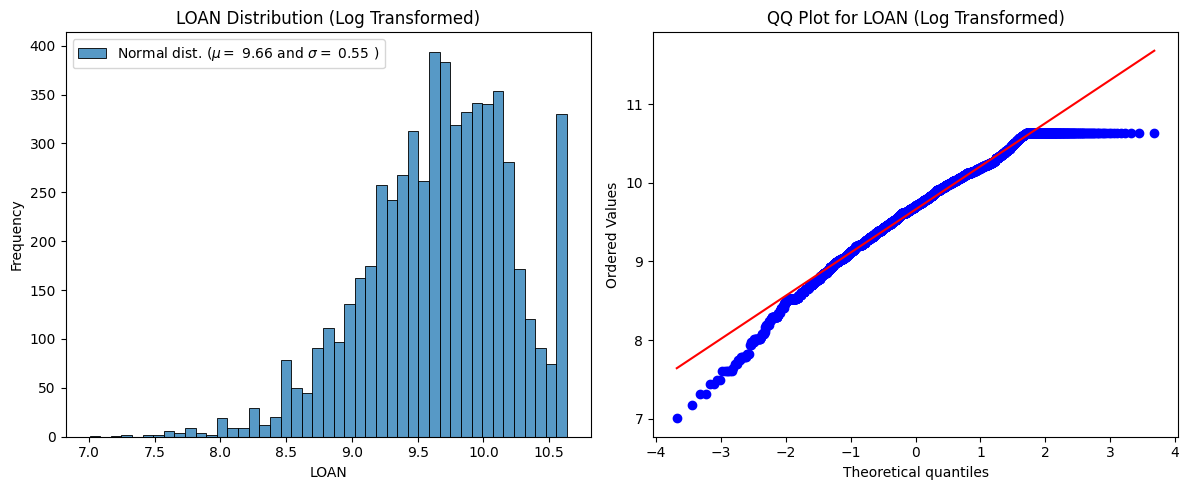

In [281]:
for col in columns:
    # Log Transform
    data[col] = np.log1p(data[col])

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Log Transformed Histogram
    sns.histplot(data[col], kde_kws={'fit': norm}, ax=axes[0])
    (mu_log, sigma_log) = norm.fit(data[col])
    axes[0].legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu_log, sigma_log)], loc='best')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title(f'{col} Distribution (Log Transformed)')

    # QQ-plot for Log Transformed
    probplot(data[col], plot=axes[1])
    axes[1].set_title(f'QQ Plot for {col} (Log Transformed)')

    plt.tight_layout()
    plt.show()

## Encode

In [282]:
cat_cols.columns

Index(['REASON', 'JOB'], dtype='object')

In [283]:
encode_columns = ["REASON", "JOB"]

data = pd.get_dummies(data, columns=encode_columns, drop_first=True)

bool_columns = [col for col in data.columns if data[col].dtype == bool]

data[bool_columns] = data[bool_columns].astype(int)

In [284]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5950 entries, 0 to 5959
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   BAD             5950 non-null   int64  
 1   LOAN            5950 non-null   float64
 2   MORTDUE         5950 non-null   float64
 3   VALUE           5950 non-null   float64
 4   YOJ             5950 non-null   float64
 5   DEROG           5950 non-null   float64
 6   DELINQ          5950 non-null   float64
 7   CLAGE           5950 non-null   float64
 8   NINQ            5950 non-null   float64
 9   CLNO            5950 non-null   float64
 10  DEBTINC         5950 non-null   float64
 11  REASON_HomeImp  5950 non-null   int32  
 12  JOB_Office      5950 non-null   int32  
 13  JOB_Other       5950 non-null   int32  
 14  JOB_ProfExe     5950 non-null   int32  
 15  JOB_Sales       5950 non-null   int32  
 16  JOB_Self        5950 non-null   int32  
dtypes: float64(10), int32(6), int64(1)
mem

In [285]:
KNN = data.copy()
Random_Forest = data.copy()
XGBoost = data.copy()

# Models

## KNN

In [286]:
X = KNN.drop('BAD', axis=1)
y = KNN['BAD']

In [287]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [288]:
smt=SMOTE()
X_train,y_train=smt.fit_resample(X_train,y_train)

In [289]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [290]:
# import optuna
# from sklearn.model_selection import train_test_split
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import accuracy_score

# def objective(trial):
#     # Define the hyperparameters of the model
#     n_neighbors = trial.suggest_int('n_neighbors', 1, 10)
#     weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
#     algorithm = trial.suggest_categorical('algorithm', ['auto', 'ball_tree', 'kd_tree', 'brute'])

#     # Create the KNN model
#     model_knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, algorithm=algorithm)

#     # Train the model
#     model_knn.fit(X_train, y_train)

#     # Make predictions on the test set
#     y_pred = model_knn.predict(X_test)

#     # Calculate accuracy
#     accuracy = accuracy_score(y_test, y_pred)

#     return 1.0 - accuracy  # Objective is to minimize 1 - accuracy

# # Start Bayesian optimization with Optuna
# study = optuna.create_study(direction='minimize')
# study.optimize(objective, n_trials=100)

# # Get the best parameters
# best_params = study.best_params

# # Create the KNN model with the best parameters
# best_model_knn = KNeighborsClassifier(**best_params)

# # Train the best model
# best_model_knn.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = best_model_knn.predict(X_test)

# # Calculate accuracy
# accuracy = accuracy_score(y_test, y_pred)

# # Print the best parameters and accuracy
# print('Best parameters:', best_params)
# print('Accuracy:', accuracy)


In [291]:
classifier_knn = KNeighborsClassifier(n_neighbors = 1, weights='distance', algorithm = 'kd_tree')

classifier_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=1, weights='distance')

In [292]:
cv_scores_knn = cross_val_score(classifier_knn, X, y, cv=5)

print("Cross-validation scores:", cv_scores_knn)
print("Mean CV accuracy:", cv_scores_knn.mean())

Cross-validation scores: [0.81176471 0.87142857 0.84705882 0.8        0.81428571]
Mean CV accuracy: 0.82890756302521


In [293]:
y_pred = classifier_knn.predict(X_test)

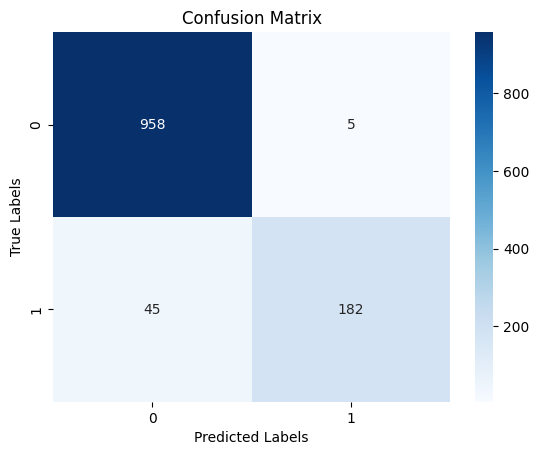

In [294]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [295]:
accuracy_knn = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_knn)

precision_knn = precision_score(y_test, y_pred)
recall_knn = recall_score(y_test, y_pred)

print("Precision:", precision_knn)
print("Recall:", recall_knn)

f1_knn = f1_score(y_test, y_pred)
print("F1 Score:", f1_knn)

Accuracy: 0.957983193277311
Precision: 0.9732620320855615
Recall: 0.801762114537445
F1 Score: 0.8792270531400967


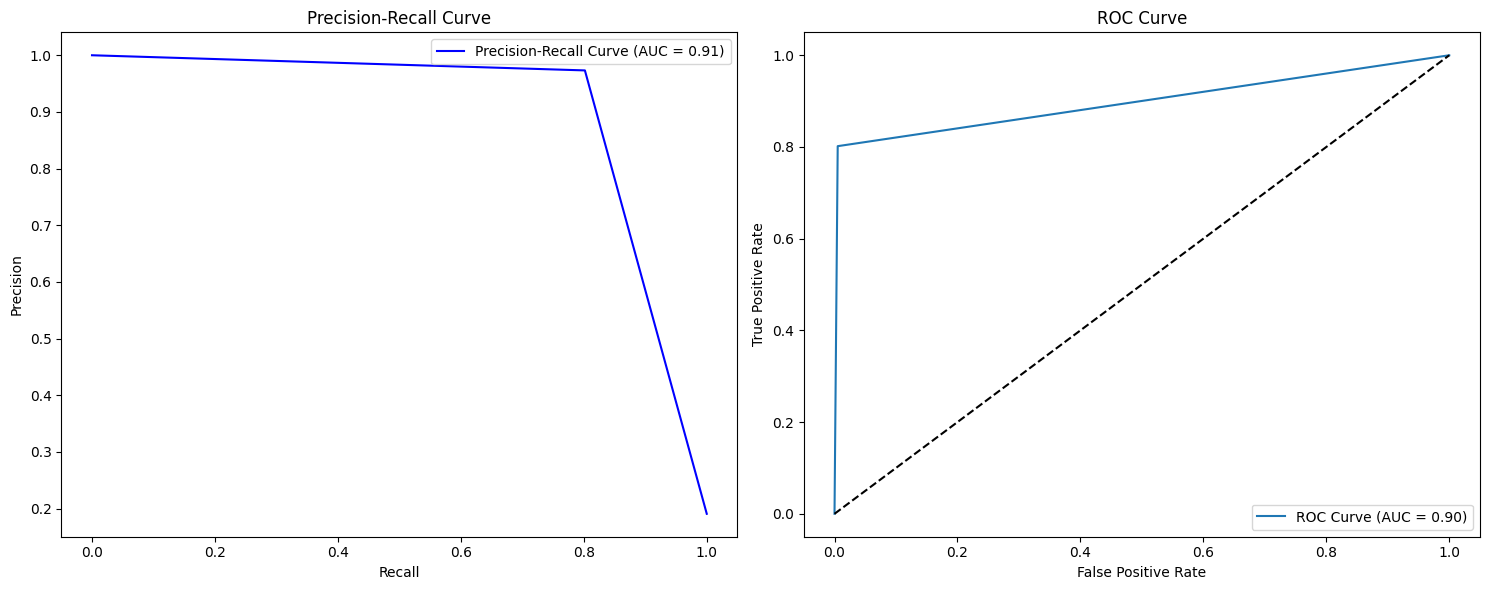

In [296]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
auc_score = auc(recall, precision)

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {auc_score:.2f})', color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

## Random Forest

In [297]:
X = Random_Forest.drop('BAD', axis=1)
y = Random_Forest['BAD']

In [298]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [299]:
smt=SMOTE()
X_train,y_train=smt.fit_resample(X_train,y_train)

In [300]:
# def objective(trial):
#     # Define the hyperparameters of the model
#     n_estimators = trial.suggest_int('n_estimators', 100, 1000, step=100)
#     criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
#     max_depth = trial.suggest_int('max_depth', 1, 32)
#     min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
#     min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
#     max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2'])

#     # Create the Random Forest model
#     model_rf = RandomForestClassifier(n_estimators=n_estimators,
#                                        criterion=criterion,
#                                        max_depth=max_depth,
#                                        min_samples_split=min_samples_split,
#                                        min_samples_leaf=min_samples_leaf,
#                                        max_features=max_features)

#     # Train the model
#     model_rf.fit(X_train, y_train)

#     # Make predictions on the test set
#     y_pred = model_rf.predict(X_test)

#     # Calculate accuracy
#     accuracy = accuracy_score(y_test, y_pred)

#     return 1.0 - accuracy  # Objective is to minimize 1 - accuracy

# # Start Bayesian optimization with Optuna
# study = optuna.create_study(direction='minimize')
# study.optimize(objective, n_trials=100)

# # Get the best parameters
# best_params = study.best_params

# # Create the Random Forest model with the best parameters
# best_model_rf = RandomForestClassifier(**best_params)

# # Train the best model
# best_model_rf.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = best_model_rf.predict(X_test)

# # Calculate accuracy
# accuracy = accuracy_score(y_test, y_pred)

# # Print the best parameters and accuracy
# print('Best parameters:', best_params)
# print('Accuracy:', accuracy)

In [302]:
classifier_random = RandomForestClassifier(n_estimators = 400, criterion='entropy', max_depth=18, max_features='log2', random_state=0)

classifier_random.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=18, max_features='log2',
                       n_estimators=400, random_state=0)

In [303]:
cv_scores_random = cross_val_score(classifier_random, X, y, cv=5)

print("Cross-validation scores:", cv_scores_random)
print("Mean CV accuracy:", cv_scores_random.mean())

Cross-validation scores: [0.21260504 0.83613445 0.88067227 0.88487395 0.85462185]
Mean CV accuracy: 0.733781512605042


In [304]:
y_pred = classifier_random.predict(X_test)

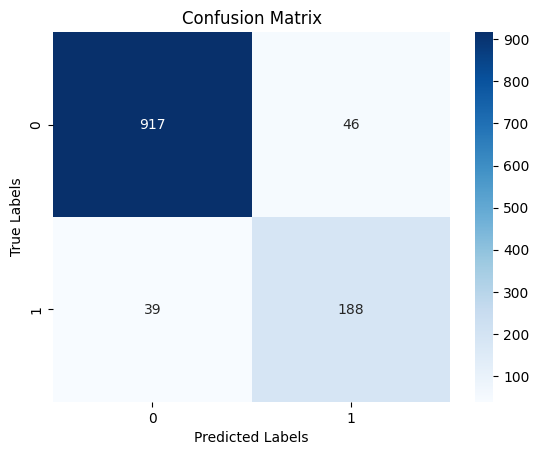

In [305]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [306]:
accuracy_random = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_random)

precision_random = precision_score(y_test, y_pred)
recall_random = recall_score(y_test, y_pred)

print("Precision:", precision_random)
print("Recall:", recall_random)

f1_random = f1_score(y_test, y_pred)
print("F1 Score:", f1_random)

Accuracy: 0.9285714285714286
Precision: 0.8034188034188035
Recall: 0.8281938325991189
F1 Score: 0.8156182212581345


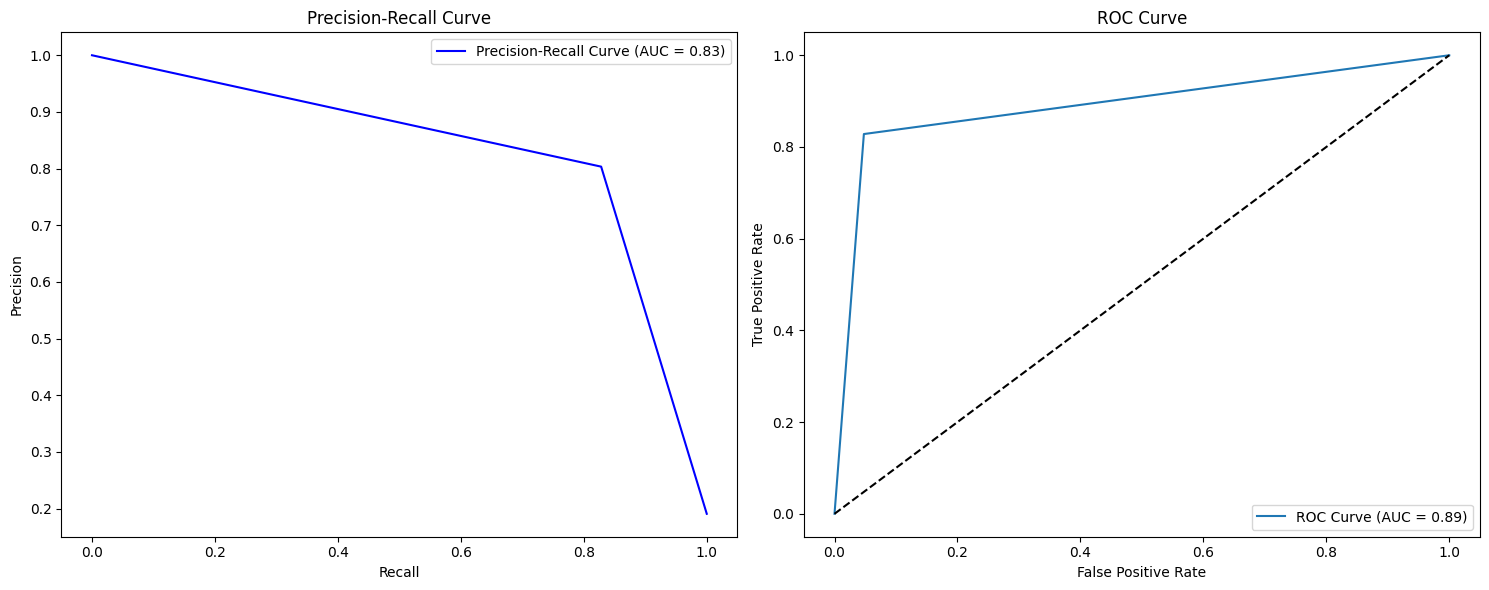

In [307]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
auc_score = auc(recall, precision)

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {auc_score:.2f})', color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

## XGBoost

In [308]:
X = XGBoost.drop("BAD", axis=1)
y = XGBoost["BAD"]

In [309]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [310]:
smt=SMOTE()
X_train,y_train=smt.fit_resample(X_train,y_train)

In [311]:
# import optuna
# from sklearn.metrics import accuracy_score
# from xgboost import XGBClassifier

# def objective(trial):
#     # Define the hyperparameters of the model
#     params = {
#         'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 1),
#         'gamma': trial.suggest_float('gamma', 0, 5),
#         'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.5),
#         'max_depth': trial.suggest_int('max_depth', 1, 10),
#         'min_child_weight': trial.suggest_float('min_child_weight', 0.1, 10),
#         'n_estimators': trial.suggest_int('n_estimators', 100, 3000),
#         'reg_alpha': trial.suggest_float('reg_alpha', 0, 1),
#         'reg_lambda': trial.suggest_float('reg_lambda', 0, 1),
#         'subsample': trial.suggest_float('subsample', 0.1, 1),
#         'random_state': 7,
#         'nthread': -1
#     }

#     # Create the XGBoost model
#     model_xgb = XGBClassifier(**params)

#     # Train the model
#     model_xgb.fit(X_train, y_train)

#     # Make predictions on the test set
#     y_pred = model_xgb.predict(X_test)

#     # Calculate classification accuracy
#     accuracy = accuracy_score(y_test, y_pred)

#     return accuracy

# # Start Bayesian optimization with Optuna
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=100)

# # Print the best parameters and accuracy value
# print('Best parameters:', study.best_params)
# print('Best accuracy:', study.best_value)

In [312]:
classifier_xgb = XGBClassifier()

classifier_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [313]:
cv_scores_xgb = cross_val_score(classifier_xgb, X, y, cv=5)

print("Cross-validation scores:", cv_scores_xgb)
print("Mean CV accuracy:", cv_scores_xgb.mean())

Cross-validation scores: [0.20168067 0.61680672 0.67394958 0.85042017 0.82436975]
Mean CV accuracy: 0.6334453781512606


In [314]:
y_pred = classifier_xgb.predict(X_test)

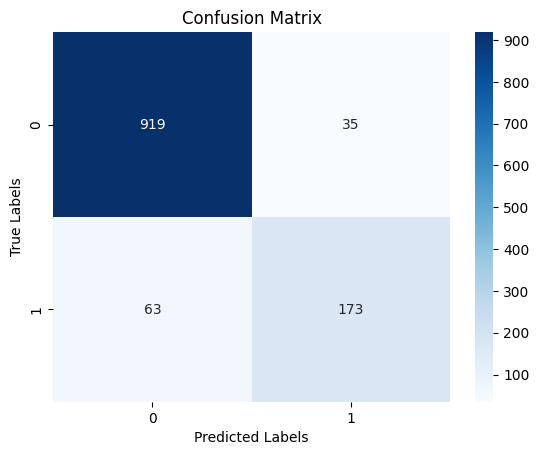

In [315]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [316]:
accuracy_xgb = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_xgb)

precision_xgb = precision_score(y_test, y_pred)
recall_xgb = recall_score(y_test, y_pred)

print("Precision:", precision_xgb)
print("Recall:", recall_xgb)

f1_xgb = f1_score(y_test, y_pred)
print("F1 Score:", f1_xgb)

Accuracy: 0.9176470588235294
Precision: 0.8317307692307693
Recall: 0.7330508474576272
F1 Score: 0.7792792792792794


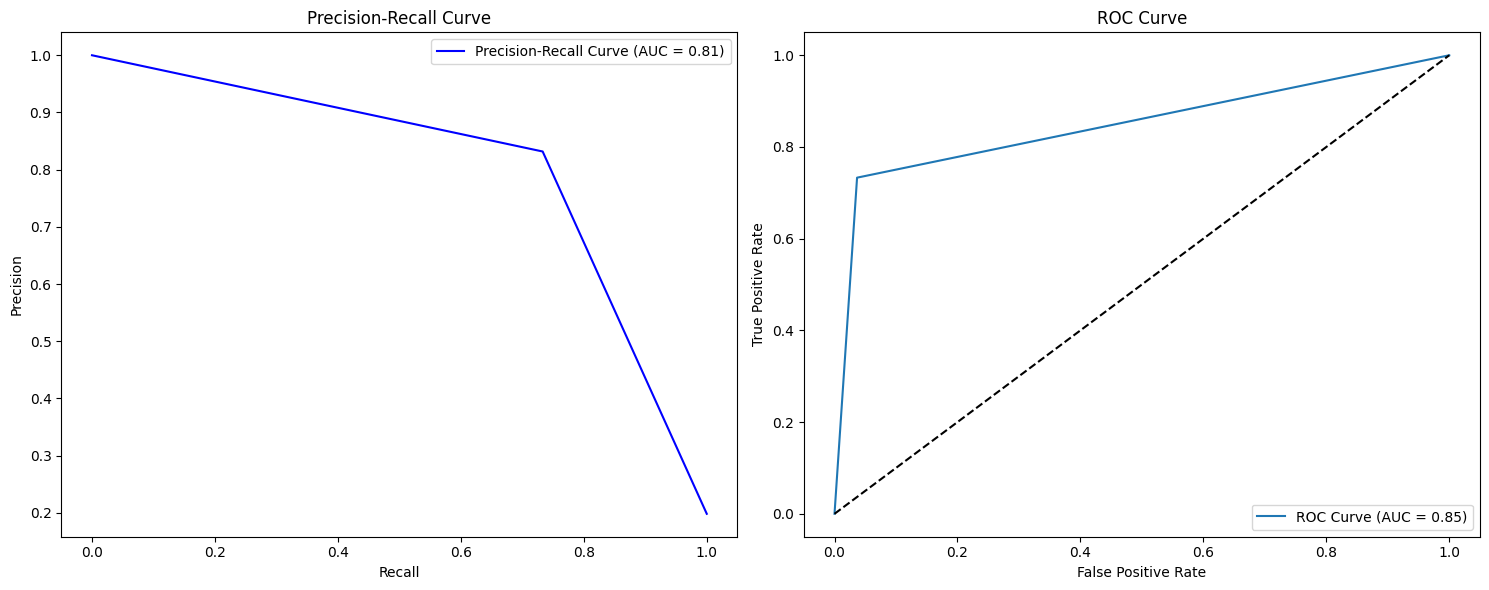

In [317]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
auc_score = auc(recall, precision)

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {auc_score:.2f})', color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

# All Model Metrics

In [318]:
model_metrics_list = []

model_metrics_list.append({
    'Model': 'KNN',
    'Accuracy': accuracy_knn,
    'Precision': precision_knn,
    'Recall': recall_knn,
    'F1 Score': f1_knn,
    'Mean CV Accuracy': cv_scores_knn.mean()
})

model_metrics_list.append({
    'Model': 'Random Forest',
    'Accuracy': accuracy_random,
    'Precision': precision_random,
    'Recall': recall_random,
    'F1 Score': f1_random,
    'Mean CV Accuracy': cv_scores_random.mean()
})

model_metrics_list.append({
    'Model': 'XGBoost',
    'Accuracy': accuracy_xgb,
    'Precision': precision_xgb,
    'Recall': recall_xgb,
    'F1 Score': f1_xgb,
    'Mean CV Accuracy': cv_scores_xgb.mean()
})

all_metrics_df = pd.DataFrame(model_metrics_list)

all_metrics_df


,Model,Accuracy,Precision,Recall,F1 Score,Mean CV Accuracy
0,KNN,0.957983,0.973262,0.801762,0.879227,0.828908
1,Random Forest,0.928571,0.803419,0.828194,0.815618,0.733782
2,XGBoost,0.917647,0.831731,0.733051,0.779279,0.633445
